<h2>CIFAR-10 Image Classification</h2>
<h3>ST1504 Deep Learning CA1 Part B</h3>

##### Name: Haja Amir Rahman
##### Class: DAAA/FT/2B/06
##### Admin Number: P2100803

### References:
- [CIFAR-100 Dataset - Keras](https://keras.io/api/datasets/cifar100/)
- [CIFAR100 Homepage](https://www.cs.toronto.edu/~kriz/cifar.html)
- [Kaggle-CIFAR100](https://www.kaggle.com/datasets/fedesoriano/cifar100)
- [EfficientNetV2](https://arxiv.org/abs/2104.00298)
    
<h4><b>Notebook Contents:</b></h4>
1. Data Exploration/Background Research<br>
2. Data Augmentation/Feature Engineering<br>
3. Modelling & Evaluation<br>
4. Model Improvement<br>

<h3><b>1. Data Exploration/ Background Research</b></h3>

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images, with 10 labels.

* Import all modules
* Load dataset
* Rescale test and train images

In [5]:
# !pip install keras-efficientnet-v2

In [1]:
from keras.layers import *
# LSTM,ReLU, Dense,GaussianNoise, Bidirectional, Conv2D, AveragePooling2D, GlobalAveragePooling2D,MaxPooling2D, BatchNormalization,Add, DepthwiseConv2D,Multiply,Activation
from tensorflow.keras.activations import swish,sigmoid
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
import numpy as np
import seaborn as sns
import keras_efficientnet_v2
# import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from keras import layers
from tensorflow.keras import Sequential

2022-11-08 09:34:47.046244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train_fine),(x_test, y_test_fine)= tf.keras.datasets.cifar100.load_data(label_mode="fine")
(x_train, y_train_coarse),(x_test, y_test_coarse)= tf.keras.datasets.cifar100.load_data(label_mode="coarse")

x_train, x_val, y_train_fine, y_val_fine, y_train_coarse, y_val_coarse = train_test_split(
    x_train, y_train_fine, y_train_coarse, train_size=0.9, random_state=0
)

x_test = x_test/255
x_train = x_train/255
x_val = x_val/255
# y_test = to_categorical(y_test,100)

print(x_train.shape, y_train_fine.shape, y_train_coarse.shape)
print(x_val.shape, y_val_fine.shape, y_val_coarse.shape)
print(x_test.shape, y_test_fine.shape, y_test_coarse.shape)

(45000, 32, 32, 3) (45000, 1) (45000, 1)
(5000, 32, 32, 3) (5000, 1) (5000, 1)
(10000, 32, 32, 3) (10000, 1) (10000, 1)


* 50000 images of 32x32x3 for training and 50000 labels to pair with the images

* 10000 images of 32x32x3 for testing/validation and 10000 labels to pair with the images

In [3]:
print(pd.DataFrame(y_train_fine).value_counts().shape)
print(pd.DataFrame(y_train_coarse).value_counts().shape)

(100,)
(20,)


In [4]:
# extracting classnames
raw = """
aquatic mammals	beaver, dolphin, otter, seal, whale
fish	aquarium fish, flatfish, ray, shark, trout
flowers	orchids, poppies, roses, sunflowers, tulips
food containers	bottles, bowls, cans, cups, plates
fruit and vegetables	apples, mushrooms, oranges, pears, sweet peppers
household electrical devices	clock, computer keyboard, lamp, telephone, television
household furniture	bed, chair, couch, table, wardrobe
insects	bee, beetle, butterfly, caterpillar, cockroach
large carnivores	bear, leopard, lion, tiger, wolf
large man-made outdoor things	bridge, castle, house, road, skyscraper
large natural outdoor scenes	cloud, forest, mountain, plain, sea
large omnivores and herbivores	camel, cattle, chimpanzee, elephant, kangaroo
medium-sized mammals	fox, porcupine, possum, raccoon, skunk
non-insect invertebrates	crab, lobster, snail, spider, worm
people	baby, boy, girl, man, woman
reptiles	crocodile, dinosaur, lizard, snake, turtle
small mammals	hamster, mouse, rabbit, shrew, squirrel
trees	maple, oak, palm, pine, willow
vehicles 1	bicycle, bus, motorcycle, pickup truck, train
vehicles 2	lawn-mower, rocket, streetcar, tank, tractor
""".strip()

coarse_classnames = []
fine_classnames = []

for line in raw.split("\n"):
    big, small = line.split("\t")
    small = [i.strip() for i in small.split(",")]
    
    coarse_classnames.append(big)
    fine_classnames.extend(small)
    
print(coarse_classnames)
print()
print(fine_classnames)

['aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 'household electrical devices', 'household furniture', 'insects', 'large carnivores', 'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores', 'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees', 'vehicles 1', 'vehicles 2']

['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 'bottles', 'bowls', 'cans', 'cups', 'plates', 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee

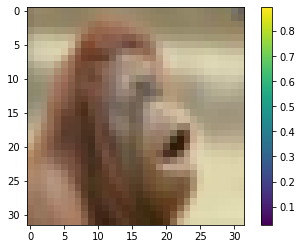

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

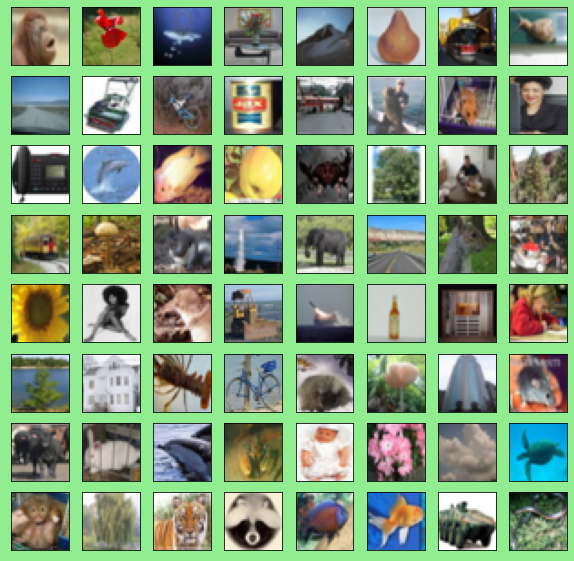

In [7]:
plt.figure(figsize=(10,10),facecolor="lightgreen")
for i in range(64): # 25 images
  plt.subplot(8,8,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
plt.show()

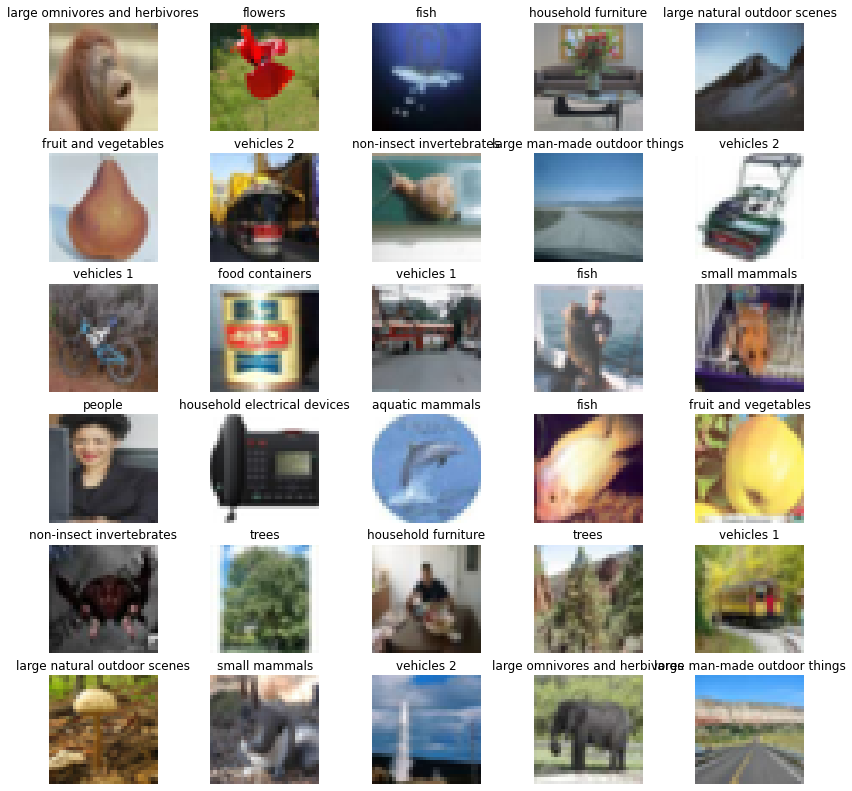

In [8]:
import matplotlib.pyplot as plt

NUM_ROW = 6               # CHANGE THIS
NUM_COL = 5               # CHANGE THIS
WIDTH = 14                # CHANGE THIS
HEIGHT = 14               # CHANGE THIS

fig, ax = plt.subplots(NUM_ROW, NUM_COL, figsize=(WIDTH, HEIGHT))
row_i = 0
col_i = 0

for i in range(30):        # CHANGE THIS

    img = x_train[i]
    
    coarse_label_index = y_train_coarse[i][0]
    coarse_label = coarse_classnames[coarse_label_index]
    
    fine_label_index = y_train_fine[i][0]
    fine_label = fine_classnames[fine_label_index]
    
    ax[row_i, col_i].imshow(img, cmap=plt.cm.binary)
    ax[row_i, col_i].set_title(f"{coarse_label}")
    ax[row_i, col_i].axis("off")

    col_i += 1
    if col_i > NUM_COL-1:
        row_i += 1
        col_i = 0
        
plt.show()

## Objectives/Tasks

- Be able to accurately identify the test images fed to the model
- Get highest possible accuracy and loss (>90% accuracy)
- Use regularization methods, data augmentation and different model architecture to reduce overfitting while improving accuracy and loss

<h3><b>2. Data Augmentation</h3></b>

# Simple Baseline Model

In [15]:
baseline_coarse_model = Sequential([
    layers.Conv2D(32, (2,2), activation="relu", input_shape=(32, 32, 3)),
    layers.Flatten(), # 2d to 1d
    layers.Dense(20)
])

#copy pasted from documentation
baseline_coarse_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

baseline_coarse_model.summary()

baseline_coarse_model_history = baseline_coarse_model.fit(x_train, y_train_coarse, epochs=5, validation_data=(x_val, y_val_coarse))
baseline_coarse_model_history

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 31, 31, 32)        416       
                                                                 
 flatten_3 (Flatten)         (None, 30752)             0         
                                                                 
 dense_3 (Dense)             (None, 20)                615060    
                                                                 
Total params: 615,476
Trainable params: 615,476
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1407/1407 [==============================] - 16s 11ms/step - loss: 2.2904 - accuracy: 0.3122 - val_loss: 2.1362 - val_accuracy: 0.3640
Epoch 2/5
1407/1407 [==============================] - 19s 13ms/step - loss: 1.9509 - accuracy: 0.4128 - val_loss: 2.0540 - val_accuracy: 0.3924
Epoch 3/5
1407/1407 [=

In [16]:
# evaluating baseline coarse model
print(baseline_coarse_model.evaluate(x_test, y_test_coarse))

313/313 [==============================] - 2s 6ms/step - loss: 2.0899 - accuracy: 0.3927
[2.0899338722229004, 0.3926999866962433]


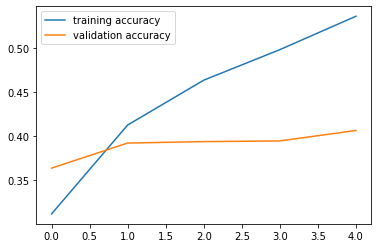

In [17]:
plt.plot(baseline_coarse_model_history.history['accuracy'], label='training accuracy')
plt.plot(baseline_coarse_model_history.history['val_accuracy'], label='validation accuracy')
plt.legend()

plt.show()

In [18]:
baseline_fine_model = Sequential([
    layers.Conv2D(32, (2,2), activation="relu", input_shape=(32, 32, 3)),
    layers.Flatten(), # 2d to 1d
    layers.Dense(100)
])

#copy pasted from documentation
baseline_fine_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

baseline_fine_model.summary()

baseline_fine_model_history = baseline_fine_model.fit(x_train, y_train_fine, epochs=5, validation_data=(x_val, y_val_fine))
baseline_fine_model_history

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 31, 31, 32)        416       
                                                                 
 flatten_4 (Flatten)         (None, 30752)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               3075300   
                                                                 
Total params: 3,075,716
Trainable params: 3,075,716
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1407/1407 [==============================] - 43s 29ms/step - loss: 3.4629 - accuracy: 0.2101 - val_loss: 3.1094 - val_accuracy: 0.2634
Epoch 2/5
1407/1407 [==============================] - 42s 30ms/step - loss: 2.5507 - accuracy: 0.3824 - val_loss: 3.0716 - val_accuracy: 0.2794
Epoch 3/5
1407/140

In [19]:
# evaluating baseline modes
print(baseline_fine_model.evaluate(x_test, y_test_fine))

313/313 [==============================] - 1s 3ms/step - loss: 3.6341 - accuracy: 0.2744
[3.6341402530670166, 0.274399995803833]


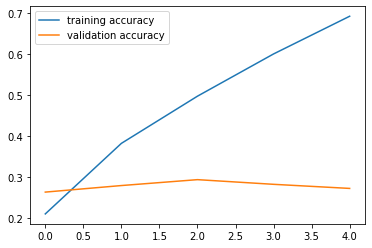

In [20]:
plt.plot(baseline_fine_model_history.history['accuracy'], label='training accuracy')
plt.plot(baseline_fine_model_history.history['val_accuracy'], label='validation accuracy')
plt.legend()

plt.show()

In [54]:
# ATTENTION. train using school lab computer with GPU

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add 
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

def res_identity(x, filters): 
    #renet block where dimension doesnot change.
    #The skip connection is just simple identity conncection
    #we will have 3 blocks and then input will be added

    x_skip = x # this will be used for addition with the residual block 
    f1, f2 = filters

    #first block 
    x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)

    #second block # bottleneck (but size kept same with padding)
    x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)

    # third block activation used after adding the input
    x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    # x = Activation(activations.relu)(x)

    # add the input 
    x = Add()([x, x_skip])
    x = Activation(activations.relu)(x)

    return x

def res_conv(x, s, filters):
    '''
    here the input size changes''' 
    x_skip = x
    f1, f2 = filters

    # first block
    x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x)
    # when s = 2 then it is like downsizing the feature map
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)

    # second block
    x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)

    #third block
    x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)

    # shortcut 
    x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x_skip)
    x_skip = BatchNormalization()(x_skip)

    # add 
    x = Add()([x, x_skip])
    x = Activation(activations.relu)(x)

    return x

def resnet50():
    input_im = Input(shape=(32,32,3))
    x = ZeroPadding2D(padding=(3, 3))(input_im)

    # 1st stage
    # here we perform maxpooling, see the figure above
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    #2nd stage 
    # frm here on only conv block and identity block, no pooling

    x = res_conv(x, s=1, filters=(64, 256))
    x = res_identity(x, filters=(64, 256))
    x = res_identity(x, filters=(64, 256))

    # 3rd stage

    # x = res_conv(x, s=2, filters=(128, 512))
    # x = res_identity(x, filters=(128, 512))
    # x = res_identity(x, filters=(128, 512))
    # x = res_identity(x, filters=(128, 512))

    # 4th stage

    # x = res_conv(x, s=2, filters=(256, 1024))
    # x = res_identity(x, filters=(256, 1024))
    # x = res_identity(x, filters=(256, 1024))
    # x = res_identity(x, filters=(256, 1024))
    # x = res_identity(x, filters=(256, 1024))
    # x = res_identity(x, filters=(256, 1024))

    # 5th stage

    # x = res_conv(x, s=2, filters=(512, 2048))
    # x = res_identity(x, filters=(512, 2048))
    # x = res_identity(x, filters=(512, 2048))

    # ends with average pooling and dense connection

    # x = AveragePooling2D((2, 2), padding='same')(x)

    x = Flatten()(x)
    x = Dense(20, activation='softmax', kernel_initializer='he_normal')(x) #multi-class

    # define the model 

    model = Model(inputs=input_im, outputs=x, name='Resnet50')

    return model

resnet50_model = resnet50()
resnet50_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), 
                       metrics=['acc'])

In [55]:
import scipy
train_DataGen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2, 
                                                                width_shift_range=0.1, 
                                                                height_shift_range = 0.1, 
                                                                horizontal_flip=True)
batch_size=64

train_lab_categorical_coarse = tf.keras.utils.to_categorical(
    y_train_coarse, num_classes=20, dtype='uint8')

train_set_conv = train_DataGen.flow(x_train, train_lab_categorical_coarse, batch_size=batch_size)

resnet_history = resnet50_model.fit(train_set_conv, epochs=5)

Epoch 1/5
704/704 [==============================] - 72s 100ms/step - loss: 4.0058 - acc: 0.2502
Epoch 2/5
704/704 [==============================] - 81s 114ms/step - loss: 2.9696 - acc: 0.3518
Epoch 3/5
704/704 [==============================] - 87s 123ms/step - loss: 2.5330 - acc: 0.3997
Epoch 4/5
704/704 [==============================] - 88s 125ms/step - loss: 2.2465 - acc: 0.4345
Epoch 5/5
704/704 [==============================] - 89s 127ms/step - loss: 2.0742 - acc: 0.4523


In [59]:
resnet50_model.evaluate(x=x_test, y=y_test_coarse)

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 20) are incompatible


## EfficientNetV2 Architecture

In [56]:
# # efficient net 2
# from tensorflow.keras.applications.efficientnet import *

# from tensorflow.keras.models import Sequential
# from tensorflow.keras import layers

# import warnings
# warnings.filterwarnings('ignore')

# AUTOTUNE = tf.data.experimental.AUTOTUNE
# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_coarse))
# train_dataset = train_dataset.shuffle(buffer_size=1000, reshuffle_each_iteration=True)
# train_dataset = train_dataset.batch(64).prefetch(AUTOTUNE)

# img_augmentation = Sequential(
#     [
#         layers.RandomRotation(factor=0.15),
#         layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
#         layers.RandomFlip(),
#         layers.RandomContrast(factor=0.1),
#     ],
#     name="img_augmentation",
# )

# def build_model(num_classes):
#     inputs = layers.Input(shape=(32, 32, 3))
#     x = img_augmentation(inputs)
#     model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

#     # Freeze the pretrained weights
#     model.trainable = False

#     # Rebuild top
#     x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
#     x = layers.BatchNormalization()(x)

#     top_dropout_rate = 0.2
#     x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
#     outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

#     # Compile
#     model = tf.keras.Model(inputs, outputs, name="EfficientNet")
#     optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
#     model.compile(
#         optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
#     )
#     return model

# ef_model = build_model(20)
# ef_model.fit(train_dataset, epochs=5)

In [ ]:
# HOW TO SAVE MODEL
# model.save_weights("filename.h5")